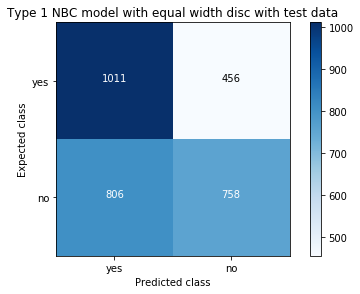

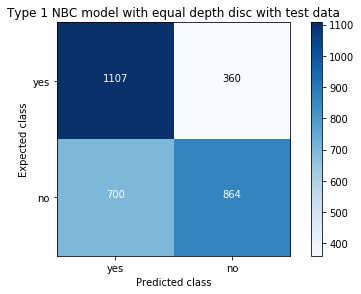

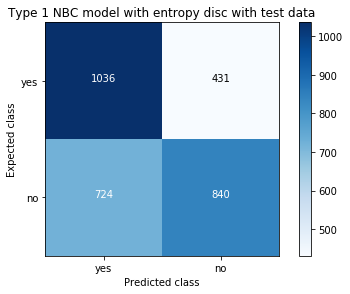

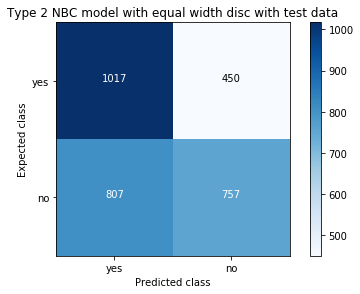

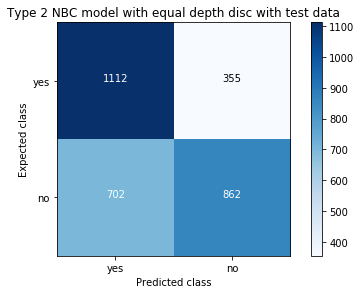

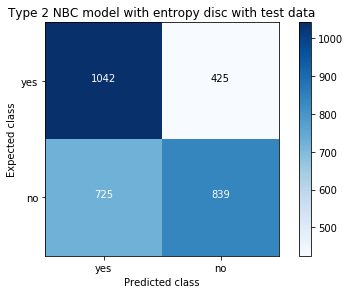

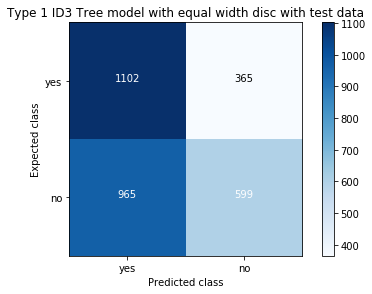

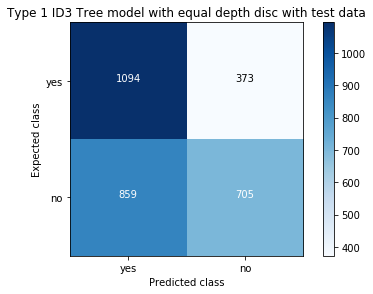

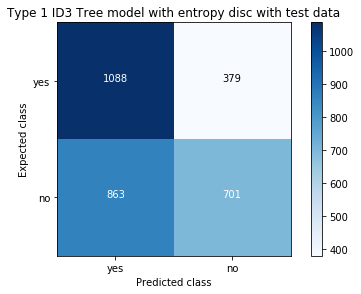

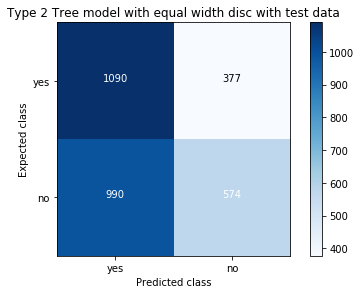

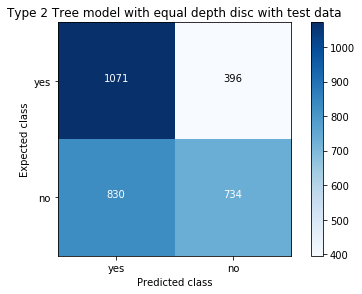

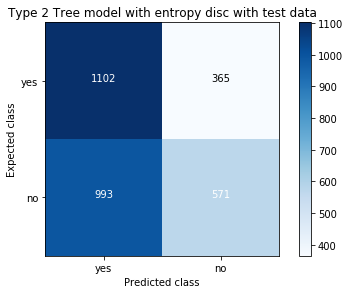

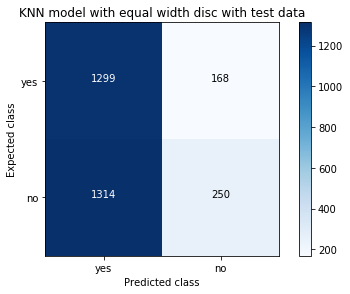

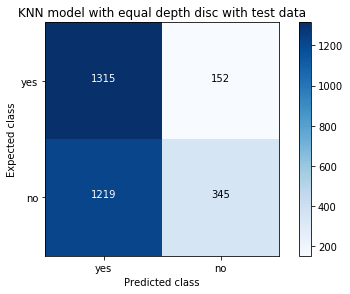

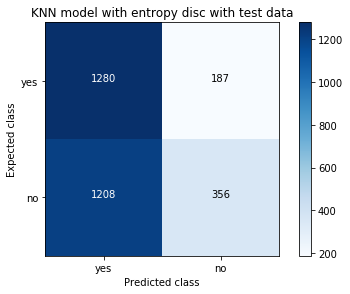

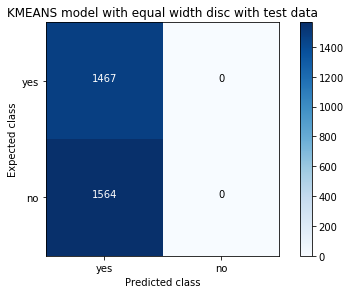

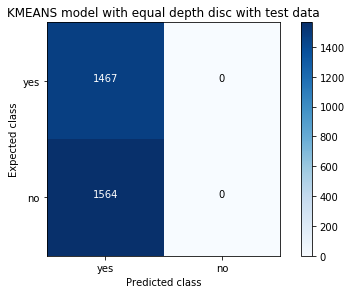

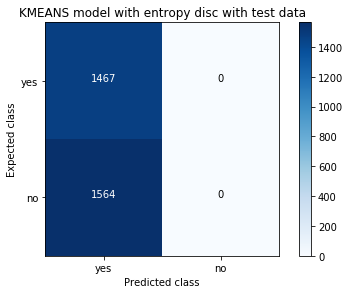

In [4]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
# THIS CODE DOESN'T WORK
def plot_mtx(mtx, axes, title, classes):
    axes.imshow(mtx, interpolation='nearest', cmap=plt.cm.Blues)
    axes.set_title(title)
    #axes.colorbar()
    tick_marks = np.arange(len(classes))
    axes.set_xticks(tick_marks)
    axes.set_yticks(tick_marks)

    thresh = mtx.max() / 2.
    for i, j in itertools.product(range(mtx.shape[0]), range(mtx.shape[1])):
        axes.text(j, i, mtx[i, j],
                 horizontalalignment="center",
                 color="white" if mtx[i, j] > thresh else "black")

    axes.ylabel("Expected class")
    axes.xlabel("Predicted class")

df = pd.read_csv("Per sample results for test data.csv")
y_true = df["class"]
y_preds = [df[col] for col in df.drop(labels=["class"], axis=1)][1:]
classes = y_true.unique()

np.set_printoptions(precision=2)
cols, rows = 3, len(y_preds) // 3 + 1
fig, ax_arr = plt.subplots(rows, cols, squeeze=False)
for y_pred, ax in zip(y_preds, ax_arr):
    mtx = confusion_matrix(y_true, y_pred)
    plot_mtx(mtx, ax, y_pred.name, classes)

plt.show()